## 6.1 Embeding

*   Embedding층은 수많은 단어를 벡터 형태로 표현할 수 있기 때문에 텍스트 분류를 위해 사용하는 가장 기본에 해당하는 층
*   토큰(token) : 문법적으로 더 이상 나눌 수 없는 언어 요소
*   텍스트 데이터를 신경망에 이벽하기 위해서 일반적으로 토큰화 작업을 수행하고 정의된 토큰에 고유 인덱스를 부여한 뒤, 인코딩을 통해 적절한 형태로 바꿔주는 전처리 작업 과정을 거치게 됨.
*   대표적인 인코딩 방법 : 원-핫 인코딩, 이진 인코딩






In [ ]:
# 토큰화 작업 수행하기

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical

texts=['You are the Best', 'You are the Nice']

tokenizer = Tokenizer(num_words =10, oov_token='<OOV>')
tokenizer.fit_on_texts(texts)

sequences = tokenizer.texts_to_sequences(texts)

binary_results = tokenizer.sequences_to_matrix(sequences, mode='binary')

print(tokenizer.word_index)
print('------------------------')

print(f'sequences: {sequences}\n')
print(f'binary_vectors:\n {binary_results}\n')

print(to_categorical(sequences))

test_text = ['You are the One']
test_seq = tokenizer.texts_to_sequences(test_text)

print(f'test sequences: {test_seq}')

{'<OOV>': 1, 'you': 2, 'are': 3, 'the': 4, 'best': 5, 'nice': 6}
------------------------
sequences: [[2, 3, 4, 5], [2, 3, 4, 6]]

binary_vectors:
 [[0. 0. 1. 1. 1. 1. 0. 0. 0. 0.]
 [0. 0. 1. 1. 1. 0. 1. 0. 0. 0.]]

[[[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 1. 0.]]

 [[0. 0. 1. 0. 0. 0. 0.]
  [0. 0. 0. 1. 0. 0. 0.]
  [0. 0. 0. 0. 1. 0. 0.]
  [0. 0. 0. 0. 0. 0. 1.]]]
test sequences: [[2, 3, 4, 1]]


*   희소행렬 : 존재하는 단어의 인덱스를 제외하고 전부 0으로 표현, 고차원, 단어의 유사성 표현 불가능
*   밀집행렬 : 각 단어의 관계를 실수로 표현, 저차원, 데이터를 기반으로 조정되며 학습이 적절하게 진행되었다면 유사한 의미를 가지는 단어는 비슷한 공간에 표현됨

In [ ]:
# IMDB 데이터셋에 Embedding층 사용하기

from tensorflow.keras.datasets import imdb

num_words = 10000    #가장 빈번하게 사용되는 단어의 개수
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words = num_words)

17465344/17464789 [==============================] - 1s 0us/step


In [ ]:
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(25000,) (25000,)
(25000,) (25000,)


In [ ]:
print(x_train[0])
print('------------')
print(y_train[0])

#레이블은 1:긍정 0:부정
#x_train[0]에 있는 숫자들의 의미는 빈번하게 사용되는 정도

[1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480, 284, 5, 150, 4, 172, 112, 167, 2, 336, 385, 39, 4, 172, 4536, 1111, 17, 546, 38, 13, 447, 4, 192, 50, 16, 6, 147, 2025, 19, 14, 22, 4, 1920, 4613, 469, 4, 22, 71, 87, 12, 16, 43, 530, 38, 76, 15, 13, 1247, 4, 22, 17, 515, 17, 12, 16, 626, 18, 2, 5, 62, 386, 12, 8, 316, 8, 106, 5, 4, 2223, 5244, 16, 480, 66, 3785, 33, 4, 130, 12, 16, 38, 619, 5, 25, 124, 51, 36, 135, 48, 25, 1415, 33, 6, 22, 12, 215, 28, 77, 52, 5, 14, 407, 16, 82, 2, 8, 4, 107, 117, 5952, 15, 256, 4, 2, 7, 3766, 5, 723, 36, 71, 43, 530, 476, 26, 400, 317, 46, 7, 4, 2, 1029, 13, 104, 88, 4, 381, 15, 297, 98, 32, 2071, 56, 26, 141, 6, 194, 7486, 18, 4, 226, 22, 21, 134, 476, 26, 480, 5, 144, 30, 5535, 18, 51, 36, 28, 224, 92, 25, 104, 4, 226, 65, 16, 38, 1334, 88, 12, 16, 283, 5, 16, 4472, 113, 103, 32, 15, 16, 5345, 19, 178, 32]
------------
1


In [ ]:
# imdb에서 가장 빈번하게 사용되는 세 개의 단어

imdb_get_word_index = {}

for key, value in imdb.get_word_index().items():
  imdb_get_word_index[value] = key

for i in range(1,4):
  print('{} 번째로 가장 많이 쓰인 단어 = {}'.format(i, imdb_get_word_index[i]))

1 번째로 가장 많이 쓰인 단어 = the
2 번째로 가장 많이 쓰인 단어 = and
3 번째로 가장 많이 쓰인 단어 = a


In [ ]:
a = {'aa':1, "bb":2}
a.items()

dict_items([('aa', 1), ('bb', 2)])

In [ ]:
imdb_get_word_index

{34701: 'fawn',
 52006: 'tsukino',
 52007: 'nunnery',
 16816: 'sonja',
 63951: 'vani',
 1408: 'woods',
 16115: 'spiders',
 2345: 'hanging',
 2289: 'woody',
 52008: 'trawling',
 52009: "hold's",
 11307: 'comically',
 40830: 'localized',
 30568: 'disobeying',
 52010: "'royale",
 40831: "harpo's",
 52011: 'canet',
 19313: 'aileen',
 52012: 'acurately',
 52013: "diplomat's",
 25242: 'rickman',
 6746: 'arranged',
 52014: 'rumbustious',
 52015: 'familiarness',
 52016: "spider'",
 68804: 'hahahah',
 52017: "wood'",
 40833: 'transvestism',
 34702: "hangin'",
 2338: 'bringing',
 40834: 'seamier',
 34703: 'wooded',
 52018: 'bravora',
 16817: 'grueling',
 1636: 'wooden',
 16818: 'wednesday',
 52019: "'prix",
 34704: 'altagracia',
 52020: 'circuitry',
 11585: 'crotch',
 57766: 'busybody',
 52021: "tart'n'tangy",
 14129: 'burgade',
 52023: 'thrace',
 11038: "tom's",
 52025: 'snuggles',
 29114: 'francesco',
 52027: 'complainers',
 52125: 'templarios',
 40835: '272',
 52028: '273',
 52130: 'zaniacs',

Embedding층을 사용하기 위해서는 시퀀스 데이터의 길이가 전부 동일해야 한다.

-> pad_sequences() 함수 사용

-> 해당 데이터가 지정해준 길이보다 짧은 경우 0으로 채워 넣으며 긴 경우에는 잘라냄

In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

print('Before pad_sequences: ', len(x_train[0]))

pad_x_train = pad_sequences(x_train, maxlen=max_len, padding='pre')
pad_x_test = pad_sequences(x_test, maxlen=max_len, padding='pre')

print('After pad_sequences: ', len(pad_x_train[0]))

Before pad_sequences:  218
After pad_sequences:  500


In [ ]:
pad_x_train[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,   

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Flatten

model = Sequential()
model.add(Embedding(input_dim = num_words, output_dim=32, input_length=max_len))
model.add(Flatten())
model.add(Dense(1, activation='sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy',metrics=['acc'])

In [ ]:
history = model.fit(pad_x_train, y_train, batch_size=32, epochs=30, validation_split=0.2)

Epoch 1/30
625/625 [==============================] - 4s 6ms/step - loss: 0.4713 - acc: 0.7649 - val_loss: 0.3108 - val_acc: 0.8628
Epoch 2/30
625/625 [==============================] - 4s 6ms/step - loss: 0.2042 - acc: 0.9241 - val_loss: 0.2692 - val_acc: 0.8900
Epoch 3/30
625/625 [==============================] - 4s 6ms/step - loss: 0.1081 - acc: 0.9703 - val_loss: 0.2847 - val_acc: 0.8862
Epoch 4/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0523 - acc: 0.9905 - val_loss: 0.3069 - val_acc: 0.8836
Epoch 5/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0241 - acc: 0.9979 - val_loss: 0.3372 - val_acc: 0.8816
Epoch 6/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0120 - acc: 0.9997 - val_loss: 0.3678 - val_acc: 0.8778
Epoch 7/30
625/625 [==============================] - 4s 6ms/step - loss: 0.0066 - acc: 0.9999 - val_loss: 0.3814 - val_acc: 0.8788
Epoch 8/30
625/625 [==============================] - 4s 6ms/step - loss: 0.

In [ ]:
model.evaluate(pad_x_test, y_test)

782/782 [==============================] - 2s 2ms/step - loss: 0.7951 - acc: 0.8718


[0.7950819730758667, 0.8718400001525879]

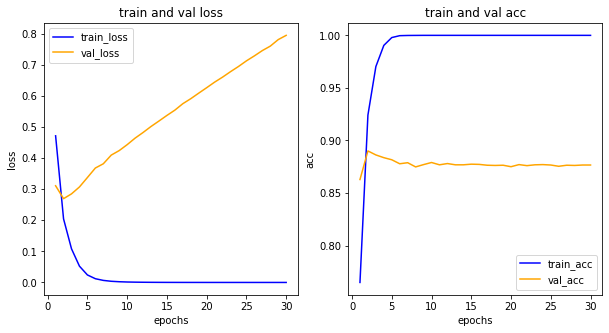

In [ ]:
import matplotlib.pyplot as plt

his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

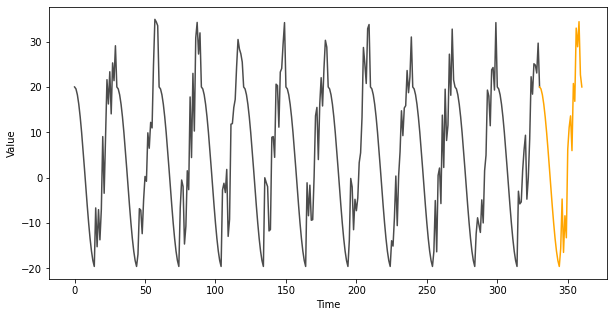

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time=np.arange(30*12 + 1)
month_time = (time%30)/30
time_series  = 20*np.where(month_time<0.5, np.cos(2*np.pi*month_time), np.cos(2*np.pi*month_time)+np.random.random(361))

plt.figure(figsize=(10,5))
plt.xlabel('Time')
plt.ylabel('Value')

plt.plot(np.arange(0,30*11+1), time_series[:30*11+1], color='black', alpha=0.7)

plt.plot(np.arange(30*11, 30*12+1), time_series[30*11:], color='orange')

In [ ]:
def make_sequence(time_series, n):
  x_train, y_train = list(), list()

  for i in range(len(time_series)):
    x=time_series[i:(i+n)]
    if (i+n)<len(time_series):
      x_train.append(x)
      y_train.append(time_series[i+n])
    else:
      break
  return np.array(x_train), np.array(y_train)

n=10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1,1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30*11]
patial_y_train = y_train[:30*11]
x_test = x_train[30*11:]
y_test = y_train[30*11:]

print('train:', patial_x_train.shape, patial_y_train.shape)
print('test:', x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [ ]:
time_series[0:10]

array([20.        , 19.56295201, 18.27090915, 16.18033989, 13.38261213,
       10.        ,  6.18033989,  2.09056927, -2.09056927, -6.18033989])

In [ ]:
len(time_series)

361

In [ ]:
x_train.shape

(351, 10, 1)

In [ ]:
y_train.shape

(351, 1)

In [ ]:
test_arr = np.arange(100)
a,b = make_sequence(test_arr, 10)

for i in range(1,4):
  print(a[i],'|',b[i])

[ 1  2  3  4  5  6  7  8  9 10] | 11
[ 2  3  4  5  6  7  8  9 10 11] | 12
[ 3  4  5  6  7  8  9 10 11 12] | 13


# SimpleRNN
- 입력 : batch_size, timesteps, input_dim
    - timesteps : 하나의 샘플에 포함된 정보의 개수 (위에서는 n=10이 timesteps임)
- 출력 : batch_size, units

** SimpleRNN층을 첫 번째 층으로 사용하는 경우 반드시 input_shape를 명시해야함

In [ ]:
from tensorflow.keras.layers import SimpleRNN, Flatten, Dense
from tensorflow.keras.models import Sequential

model = Sequential()
model.add(SimpleRNN(units=32, activation='tanh', input_shape=(n,1)))
model.add(Dense(1, activation='linear'))

model.compile(optimizer = 'adam', loss='mse')
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 32)                1088      
_________________________________________________________________
dense (Dense)                (None, 1)                 33        
Total params: 1,121
Trainable params: 1,121
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(x_train, y_train, epochs=100, batch_size=12)

Epoch 1/100
30/30 [==============================] - 0s 13ms/step - loss: 253.8393
Epoch 2/100
30/30 [==============================] - 0s 11ms/step - loss: 202.3307
Epoch 3/100
30/30 [==============================] - 0s 10ms/step - loss: 169.5636
Epoch 4/100
30/30 [==============================] - 0s 11ms/step - loss: 148.6413
Epoch 5/100
30/30 [==============================] - 0s 10ms/step - loss: 133.8297
Epoch 6/100
30/30 [==============================] - 0s 12ms/step - loss: 122.2514
Epoch 7/100
30/30 [==============================] - 0s 10ms/step - loss: 111.0928
Epoch 8/100
30/30 [==============================] - 0s 11ms/step - loss: 102.6913
Epoch 9/100
30/30 [==============================] - 0s 11ms/step - loss: 95.6236
Epoch 10/100
30/30 [==============================] - 0s 12ms/step - loss: 89.4939
Epoch 11/100
30/30 [==============================] - 0s 13ms/step - loss: 84.2387
Epoch 12/100
30/30 [==============================] - 0s 13ms/step - loss: 79.5754
Epoch

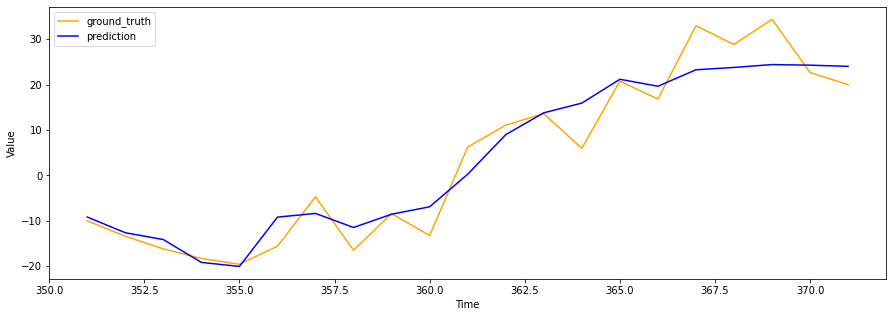

In [ ]:
pred = model.predict(x_test)

pred_range = np.arange(len(y_train), len(y_train)+len(pred))

plt.figure(figsize=(15,5))
plt.xlabel("Time")
plt.ylabel('Value')
plt.plot(pred_range, y_test.reshape(-1,), color='orange', label='ground_truth')
plt.plot(pred_range, pred.reshape(-1,), color='blue', label='prediction')
plt.legend()
plt.show()

In [ ]:
len(pred)

21

In [ ]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(x_train, y_train), (x_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=32))

model.add(SimpleRNN(32, return_sequences=True, dropout=0.15, recurrent_dropout=0.15))
model.add(SimpleRNN(32))
model.add(Dense(1, activation='sigmoid'))
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['acc'])

history = model.fit(pad_x_train, y_train, batch_size=32, epochs=15, validation_split=0.2)

17465344/17464789 [==============================] - 0s 0us/step
Epoch 1/15
625/625 [==============================] - 436s 698ms/step - loss: 0.6582 - acc: 0.5814 - val_loss: 0.5112 - val_acc: 0.7540
Epoch 2/15
625/625 [==============================] - 436s 697ms/step - loss: 0.5499 - acc: 0.7275 - val_loss: 0.6224 - val_acc: 0.6344
Epoch 3/15
625/625 [==============================] - 433s 693ms/step - loss: 0.5453 - acc: 0.7233 - val_loss: 0.5881 - val_acc: 0.6776
Epoch 4/15
625/625 [==============================] - 431s 690ms/step - loss: 0.5126 - acc: 0.7488 - val_loss: 0.4711 - val_acc: 0.7794
Epoch 5/15
625/625 [==============================] - 433s 693ms/step - loss: 0.4282 - acc: 0.8078 - val_loss: 0.4481 - val_acc: 0.8008
Epoch 6/15
625/625 [==============================] - 436s 698ms/step - loss: 0.3756 - acc: 0.8404 - val_loss: 0.4647 - val_acc: 0.7940
Epoch 7/15
625/625 [==============================] - 437s 699ms/step - loss: 0.3400 - acc: 0.8620 - val_loss: 0.4440 -

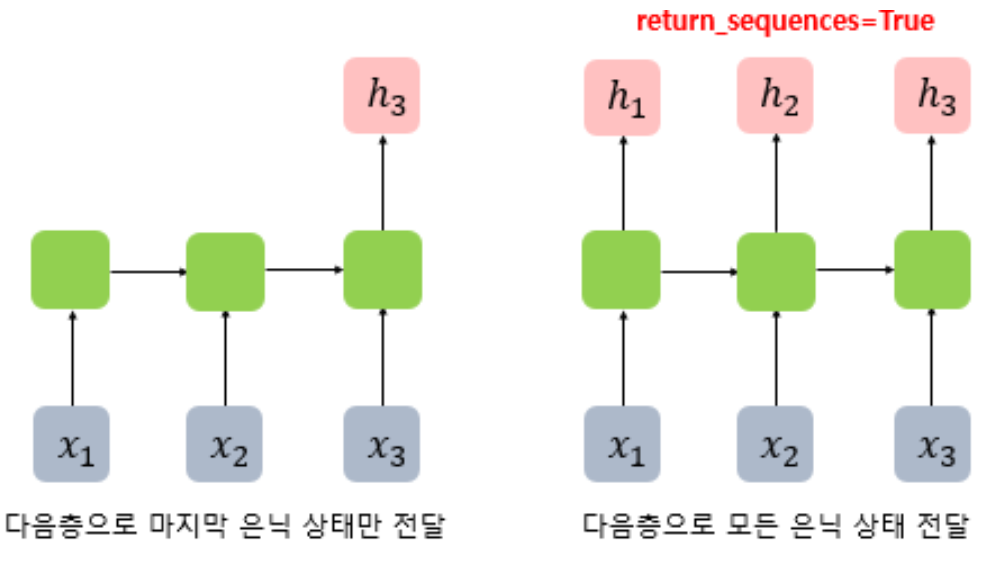

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=10000, output_dim=32))
model2.add(SimpleRNN(32, return_sequences=True))
model2.summary

In [ ]:
model2 = Sequential()
model2.add(Embedding(input_dim=10000, output_dim=32))
model2.add(SimpleRNN(32, return_sequences=False))
model2.summary

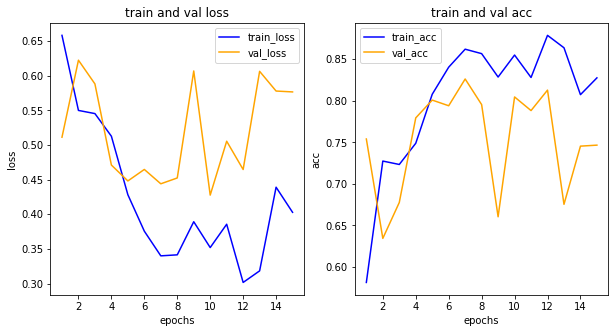

In [ ]:
import matplotlib.pyplot as plt


his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()


# LSTM

### reuters 데이터
- 일련의 문장 모음으로 구성
- 46개의 카테고리로 이루어져 있는 다중분류 문제

In [1]:
from tensorflow.keras.datasets import reuters

num_words = 10000
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=num_words)

print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

2113536/2110848 [==============================] - 0s 0us/step
(8982,) (8982,)
(2246,) (2246,)


In [2]:
from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_x_train = pad_sequences(x_train, maxlen=max_len)
pad_x_test = pad_sequences(x_test, maxlen=max_len)

print(len(pad_x_train[9]))

500


In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Embedding

model = Sequential()
model.add(Embedding(input_dim=num_words, output_dim=64))
model.add(LSTM(64, return_sequences=True))
model.add(LSTM(32))
model.add(Dense(46, activation='softmax'))

model.compile(optimizer='adam', loss = 'sparse_categorical_crossentropy', metrics=['acc'])

In [4]:
history = model.fit(pad_x_train, y_train, batch_size=32, epochs=20, validation_split=0.2)

Epoch 1/20
225/225 [==============================] - 44s 197ms/step - loss: 2.5651 - acc: 0.3514 - val_loss: 2.4091 - val_acc: 0.3450
Epoch 2/20
225/225 [==============================] - 44s 194ms/step - loss: 2.2918 - acc: 0.4011 - val_loss: 2.0615 - val_acc: 0.4869
Epoch 3/20
225/225 [==============================] - 44s 194ms/step - loss: 1.9319 - acc: 0.5048 - val_loss: 1.8113 - val_acc: 0.5320
Epoch 4/20
225/225 [==============================] - 44s 194ms/step - loss: 1.7757 - acc: 0.5292 - val_loss: 1.7665 - val_acc: 0.5275
Epoch 5/20
225/225 [==============================] - 44s 193ms/step - loss: 1.6837 - acc: 0.5564 - val_loss: 1.7247 - val_acc: 0.5559
Epoch 6/20
225/225 [==============================] - 44s 194ms/step - loss: 1.6026 - acc: 0.5833 - val_loss: 1.7136 - val_acc: 0.5554
Epoch 7/20
225/225 [==============================] - 44s 193ms/step - loss: 1.5455 - acc: 0.6042 - val_loss: 1.6806 - val_acc: 0.5743
Epoch 8/20
225/225 [==============================] - 4

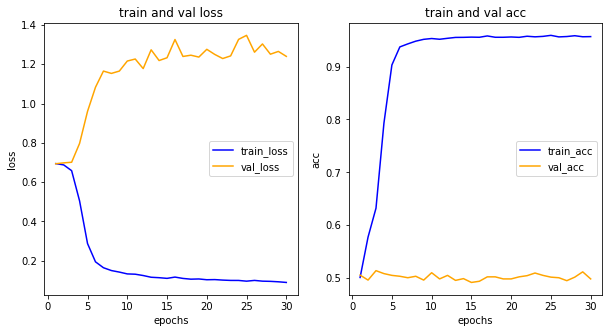

In [14]:
import matplotlib.pyplot as plt


his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()


# Conv1D

- 입력 : (batch_size, timesteps, channels)
- 출력 : (batch_size, timesteps, filters)

In [12]:
from tensorflow.keras.datasets import imdb

num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

from tensorflow.keras.preprocessing.sequence import pad_sequences

max_len = 500

pad_X_train = pad_sequences(X_train, maxlen=max_len)
pad_X_test = pad_sequences(X_test, maxlen=max_len)


from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D

model = Sequential()
# 이 층은 모델의 제일 첫 번째 층으로만 사용할 수 있습니다.
# Flatten 층을 사용하기 위해 input_length를 전달합니다.
model.add(Embedding(input_dim = num_words, output_dim = 32, input_length = max_len))
model.add(Conv1D(32, 7, activation = 'relu'))
model.add(MaxPooling1D(7))
model.add(Conv1D(32, 5, activation = 'relu'))
model.add(MaxPooling1D(5))
model.add(GlobalMaxPooling1D())
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam',
             loss = 'binary_crossentropy',
             metrics = ['acc'])


In [16]:
history = model.fit(pad_X_train, y_train, 
                    batch_size = 32, epochs = 30, 
                    validation_split = 0.2)

Epoch 1/30
625/625 [==============================] - 7s 12ms/step - loss: 0.4955 - acc: 0.7521 - val_loss: 0.3607 - val_acc: 0.8442
Epoch 2/30
625/625 [==============================] - 7s 11ms/step - loss: 0.1639 - acc: 0.9464 - val_loss: 0.3801 - val_acc: 0.8418
Epoch 3/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0517 - acc: 0.9905 - val_loss: 0.4310 - val_acc: 0.8432
Epoch 4/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0122 - acc: 0.9993 - val_loss: 0.4915 - val_acc: 0.8502
Epoch 5/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0036 - acc: 0.9998 - val_loss: 0.5421 - val_acc: 0.8506
Epoch 6/30
625/625 [==============================] - 7s 11ms/step - loss: 0.0017 - acc: 0.9999 - val_loss: 0.5852 - val_acc: 0.8508
Epoch 7/30
625/625 [==============================] - 7s 12ms/step - loss: 9.8522e-04 - acc: 0.9999 - val_loss: 0.6207 - val_acc: 0.8524
Epoch 8/30
625/625 [==============================] - 8s 13ms/ste

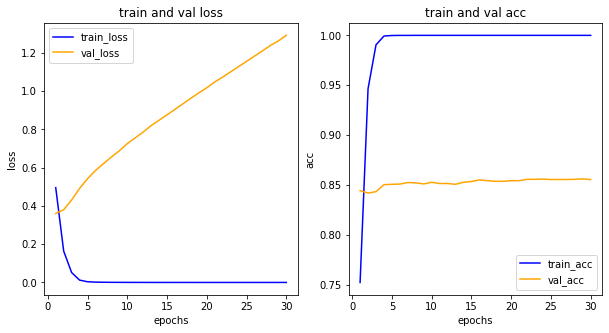

In [17]:
his_dict = history.history
loss = his_dict['loss']
val_loss = his_dict['val_loss']

epochs = range(1, len(loss)+1)
fig = plt.figure(figsize=(10,5))

#학습 및 검증 손실
ax1 = fig.add_subplot(1,2,1)
ax1.plot(epochs, loss, color='blue', label='train_loss')
ax1.plot(epochs, val_loss, color='orange', label='val_loss')
ax1.set_title('train and val loss')
ax1.set_xlabel('epochs')
ax1.set_ylabel('loss')
ax1.legend()

acc=his_dict['acc']
val_acc = his_dict['val_acc']

#학습 및 검증 정확도
ax2 = fig.add_subplot(1,2,2)
ax2.plot(epochs, acc, color='blue', label='train_acc')
ax2.plot(epochs, val_acc, color='orange', label='val_acc')
ax2.set_title('train and val acc')
ax2.set_xlabel("epochs")
ax2.set_ylabel("acc")
ax2.legend()

plt.show()

# Conv1D + LSTM

In [18]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(2020)

time = np.arange(30 * 12 + 1)
month_time = (time % 30) / 30
time_series = 20 * np.where(month_time < 0.5, 
                          np.cos(2 * np.pi * month_time),
                          np.cos(2 * np.pi * month_time) + np.random.random(361))

def make_sequence(time_series, n):
    x_train, y_train = list(), list()
    
    for i in range(len(time_series)):
        x = time_series[i:(i + n)]
        if (i + n) < len(time_series):
            x_train.append(x)
            y_train.append(time_series[i + n])
        else:
            break
            
    return np.array(x_train), np.array(y_train)

n = 10
x_train, y_train = make_sequence(time_series, n)

x_train = x_train.reshape(-1, n, 1)
y_train = y_train.reshape(-1, 1)

from sklearn.model_selection import train_test_split

patial_x_train = x_train[:30 * 11]
patial_y_train = y_train[:30 * 11]
x_test = x_train[30 * 11:]
y_test = y_train[30 * 11:]

print('train:', patial_x_train.shape, patial_y_train.shape) 
print('test:',x_test.shape, y_test.shape)

train: (330, 10, 1) (330, 1)
test: (21, 10, 1) (21, 1)


In [19]:
from tensorflow.keras.layers import Dense, Embedding, Conv1D, MaxPooling1D, GlobalMaxPooling1D
from tensorflow.keras.layers import LSTM

model = Sequential()
model.add(Conv1D(32, 3, activation = 'relu', input_shape = (10, 1)))
model.add(MaxPooling1D(2))
model.add(Conv1D(32, 3, activation = 'relu'))
# LSTM을 혼합하여 모델을 구성합니다.
model.add(LSTM(32, dropout = 0.2, recurrent_dropout = 0.2))
model.add(Dense(1))

model.compile(optimizer='adam',
             loss = 'mse',
             metrics = ['mse'])

# 학습을 진행합니다.
model.fit(x_train, y_train, epochs = 200, batch_size = 32)

pred = model.predict(x_test)

Epoch 1/200
11/11 [==============================] - 0s 20ms/step - loss: 240.3763 - mse: 240.3763
Epoch 2/200
11/11 [==============================] - 0s 16ms/step - loss: 218.5883 - mse: 218.5883
Epoch 3/200
11/11 [==============================] - 0s 17ms/step - loss: 195.5835 - mse: 195.5835
Epoch 4/200
11/11 [==============================] - 0s 18ms/step - loss: 171.7115 - mse: 171.7115
Epoch 5/200
11/11 [==============================] - 0s 18ms/step - loss: 150.6288 - mse: 150.6288
Epoch 6/200
11/11 [==============================] - 0s 16ms/step - loss: 132.9285 - mse: 132.9285
Epoch 7/200
11/11 [==============================] - 0s 16ms/step - loss: 121.0162 - mse: 121.0162
Epoch 8/200
11/11 [==============================] - 0s 17ms/step - loss: 111.3502 - mse: 111.3502
Epoch 9/200
11/11 [==============================] - 0s 19ms/step - loss: 104.7190 - mse: 104.7190
Epoch 10/200
11/11 [==============================] - 0s 16ms/step - loss: 98.1725 - mse: 98.1725
Epoch 11/20

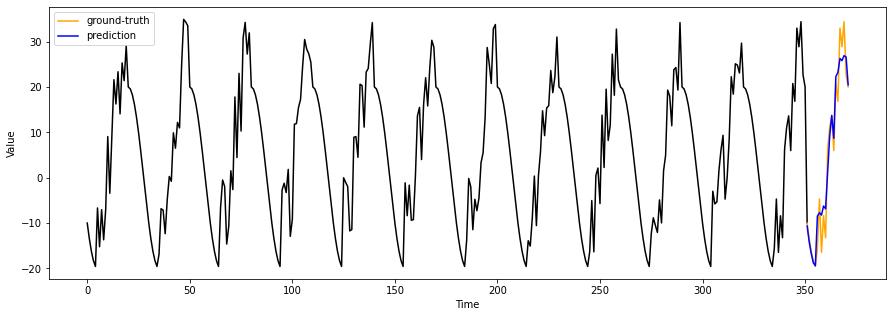

In [20]:
train_range = np.arange(len(x_train) + 1)
pred_range = np.arange(len(y_train), len(y_train) + len(pred))

plt.figure(figsize=(15,5))
plt.xlabel('Time')
plt.ylabel('Value')
plt.plot(train_range, np.append(y_train, y_test[0]), color = 'black')
plt.plot(pred_range, y_test, color='orange', label='ground-truth')
plt.plot(pred_range, pred, color='blue', label='prediction')
plt.legend()
plt.show()